In [89]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, VarianceThreshold

In [6]:
# Create a function for performing feature selection using the filter method with sklearn

### Star Dataset Pre-processing

In [32]:
star_file_name = 'datasets/star_assessment.csv'
star_features = np.genfromtxt(star_file_name, delimiter=',', skip_header=True, encoding="utf-8", usecols=range(0, 17))
star_labels = np.genfromtxt(star_file_name, delimiter=',', skip_header=True, encoding="utf-8", usecols=17, dtype=None)

In [33]:
# Explore the star dataset
print(f'Number of samples: {star_features.shape[0]}')
print(f'Number of features: {star_features.shape[1]-1}')
print(f'Number of classes: {np.unique(star_labels).shape[0]}')
print(f'Class names: {np.unique(star_labels)}')

Number of samples: 100000
Number of features: 16
Number of classes: 3
Class names: ['GALAXY' 'QSO' 'STAR']


In [34]:
# Count the number of missing values in each column
missing_vals = np.sum(np.isnan(star_features), axis=0)
for k, v in enumerate(missing_vals):
    print(f'Column {k+1}: {v} missing values')
print(f'Total: {sum(missing_vals)} missing values')

Column 1: 60 missing values
Column 2: 55 missing values
Column 3: 65 missing values
Column 4: 70 missing values
Column 5: 63 missing values
Column 6: 50 missing values
Column 7: 59 missing values
Column 8: 61 missing values
Column 9: 59 missing values
Column 10: 51 missing values
Column 11: 68 missing values
Column 12: 59 missing values
Column 13: 58 missing values
Column 14: 49 missing values
Column 15: 50 missing values
Column 16: 61 missing values
Column 17: 62 missing values
Total: 1000 missing values


In [36]:
# Use a KNN imputer to fill in the missing values
knn_imputer = KNNImputer()
star_features_imputed = knn_imputer.fit_transform(star_features)

In [40]:
# Encode the class labels
label_encoder = LabelEncoder()
star_labels_encoded = label_encoder.fit_transform(star_labels)

In [48]:
# First use a variance threshold to remove any features with zero variance
threshold = 0
variance_threshold = VarianceThreshold(threshold=threshold)
star_features_imputed = variance_threshold.fit_transform(star_features_imputed)

In [90]:
# Then us the f_classif method to determine the correlation between each feature and the class labels
select_k_best = SelectKBest()
_ = select_k_best.fit_transform(star_features_imputed, star_labels_encoded)

In [91]:
print(select_k_best.scores_)

[1.22539664e+02 2.20369305e+01 2.16985665e+02 3.03815861e+01
 2.59383620e+01 4.58628083e+03 8.27512206e+03 3.23231726e+01
 1.22533096e+02 2.67897908e+01 7.97344827e+01 5.16529250e+03
 8.33025359e+04 5.16413203e+03 4.42604878e+03 4.36604224e+02]


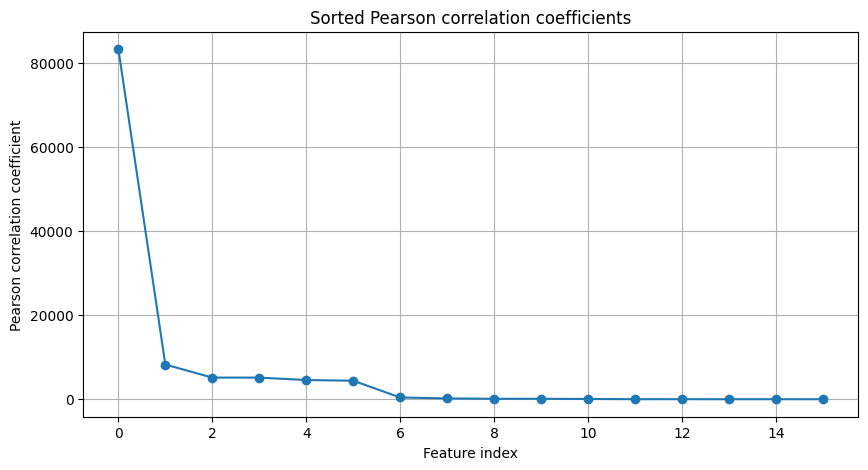

In [92]:
# Sort the coefficients in descending order
sorted_correlations = np.sort(select_k_best.scores_)[::-1]

# Plot the sorted correlation coefficients
plt.figure(figsize=(10, 5))
plt.plot(sorted_correlations, marker='o')
plt.xlabel('Feature index')
plt.ylabel('Pearson correlation coefficient')
plt.title('Sorted Pearson correlation coefficients')
plt.grid(True)

# Display the plot
plt.show()

### GWP Dataset Pre-processing

In [67]:
gwp_file_name = 'datasets/gwp_assessment.csv'
gwp_strings = np.genfromtxt(gwp_file_name, delimiter=',', skip_header=True, encoding="utf-8", dtype=str, usecols=range(0, 4))
gwp_floats = np.genfromtxt(gwp_file_name, delimiter=',', skip_header=True, encoding="utf-8", dtype=np.float64, usecols=range(4, 14))
gwp_values = np.genfromtxt(gwp_file_name, delimiter=',', skip_header=True, encoding="utf-8", dtype=np.float64, usecols=14)

In [68]:
# Explore the gwp dataset
print(f'Number of samples: {gwp_strings.shape[0]}')
print(f'Number of features: {gwp_strings.shape[1] + gwp_floats.shape[1]}')

Number of samples: 1197
Number of features: 14


In [74]:
# Count the number of missing values in each column
missing_string_vals = np.sum(np.char.strip(gwp_strings) == '', axis=0)
missing_float_vals = np.sum(np.isnan(gwp_floats), axis=0)
missing_vals = np.concatenate((missing_string_vals, missing_float_vals))
for k, v in enumerate(missing_vals):
    print(f'Column {k+1}: {v} missing values')
print(f'Total: {sum(missing_vals)} missing values')

Column 1: 18 missing values
Column 2: 11 missing values
Column 3: 7 missing values
Column 4: 15 missing values
Column 5: 12 missing values
Column 6: 17 missing values
Column 7: 8 missing values
Column 8: 506 missing values
Column 9: 9 missing values
Column 10: 5 missing values
Column 11: 12 missing values
Column 12: 12 missing values
Column 13: 13 missing values
Column 14: 10 missing values
Total: 655 missing values
